# Delhi'deki Ev Fiyatlarını Tahmin Etme

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

pd.set_option('display.max_columns', 100)

import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import ExtraTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv("Delhi house data.csv")

In [3]:
df.dropna(inplace=True)

In [4]:
df.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0
5,1300.0,4,3.0,Semi-Furnished,Rohini Sector 24,1.0,15500000,Ready_to_move,New_Property,Builder_Floor,6667.0


In [5]:
df.tail()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
1254,4118.0,4,5.0,Unfurnished,Chittaranjan Park,3.0,55000000,Ready_to_move,New_Property,Builder_Floor,12916.0
1255,1050.0,3,2.0,Semi-Furnished,Chittaranjan Park,3.0,12500000,Ready_to_move,Resale,Builder_Floor,12916.0
1256,875.0,3,3.0,Semi-Furnished,Chittaranjan Park,3.0,17500000,Ready_to_move,New_Property,Builder_Floor,12916.0
1257,990.0,2,2.0,Unfurnished,Chittaranjan Park Block A,1.0,11500000,Ready_to_move,Resale,Builder_Floor,12916.0
1258,11050.0,3,3.0,Unfurnished,Chittaranjan Park,1.0,18500000,Ready_to_move,New_Property,Builder_Floor,12916.0


In [6]:
df.sample(10)

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
773,1000.0000,3,2.0,Semi-Furnished,"Manglapuri, Sultanpur",1.0,7000000,Ready_to_move,New_Property,Builder_Floor,7000.0
316,445.0000,2,1.0,Unfurnished,"Ram Nagar Extension, Shahdara",1.0,2000000,Ready_to_move,Resale,Builder_Floor,6526.0
1008,2518.7526,4,5.0,Unfurnished,"Godrej South Estate, Okhla Phase 1",2.0,68900000,Almost_ready,New_Property,Apartment,10320.0
703,2700.0000,4,4.0,Unfurnished,Greater Kailash 4 Nri Colony,2.0,36500000,Ready_to_move,Resale,Builder_Floor,12500.0
322,900.0000,3,2.0,Semi-Furnished,"Ram Nagar Extension, Shahdara",1.0,6000000,Almost_ready,New_Property,Builder_Floor,3901.0
489,540.0000,2,2.0,Semi-Furnished,"Kushwaha Homes, Uttam Nagar",1.0,3300000,Ready_to_move,New_Property,Apartment,6111.0
670,1850.0000,3,3.0,Unfurnished,"Common Wealth Games Village, Commonwealth Game...",2.0,37500000,Ready_to_move,Resale,Apartment,20270.0
310,810.0000,3,2.0,Semi-Furnished,"Yamuna Vihar, Shahdara",1.0,6000000,Ready_to_move,Resale,Builder_Floor,6526.0
114,1700.0000,3,3.0,Semi-Furnished,Lajpat Nagar 3,1.0,27500000,Ready_to_move,Resale,Builder_Floor,16176.0
772,1000.0000,3,3.0,Semi-Furnished,"New Manglapuri, Sultanpur",1.0,5500000,Ready_to_move,New_Property,Apartment,3714.0


In [7]:
df.shape

(1005, 11)

In [8]:
df.describe()

,Area,BHK,Bathroom,Parking,Price,Per_Sqft
count,1005.000000,1005.000000,1005.000000,1005.000000,1.005000e+03,1005.000000
mean,1504.301968,2.791045,2.575124,1.697512,2.224030e+07,15663.630846
std,1729.104830,0.961469,1.088503,3.223118,2.771744e+07,21170.160448
min,28.000000,1.000000,1.000000,1.000000,1.000000e+06,1259.000000
25%,770.000000,2.000000,2.000000,1.000000,5.130000e+06,6364.000000
50%,1150.000000,3.000000,2.000000,1.000000,1.400000e+07,11363.000000
75%,1700.000000,3.000000,3.000000,2.000000,2.700000e+07,18000.000000
max,24300.000000,7.000000,7.000000,39.000000,2.400000e+08,183333.000000


In [9]:
df.corr()

,Area,BHK,Bathroom,Parking,Price,Per_Sqft
Area,1.000000,0.463013,0.535153,0.004128,0.574410,0.165277
BHK,0.463013,1.000000,0.811590,-0.085984,0.599587,0.181284
Bathroom,0.535153,0.811590,1.000000,-0.030707,0.732241,0.220475
Parking,0.004128,-0.085984,-0.030707,1.000000,0.035894,0.001607
Price,0.574410,0.599587,0.732241,0.035894,1.000000,0.325240
Per_Sqft,0.165277,0.181284,0.220475,0.001607,0.325240,1.000000


In [10]:
df.columns.tolist()

['Area',
 'BHK',
 'Bathroom',
 'Furnishing',
 'Locality',
 'Parking',
 'Price',
 'Status',
 'Transaction',
 'Type',
 'Per_Sqft']

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1005 entries, 1 to 1258
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1005 non-null   float64
 1   BHK          1005 non-null   int64  
 2   Bathroom     1005 non-null   float64
 3   Furnishing   1005 non-null   object 
 4   Locality     1005 non-null   object 
 5   Parking      1005 non-null   float64
 6   Price        1005 non-null   int64  
 7   Status       1005 non-null   object 
 8   Transaction  1005 non-null   object 
 9   Type         1005 non-null   object 
 10  Per_Sqft     1005 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 94.2+ KB


In [12]:
df.isnull().sum()

Area           0
BHK            0
Bathroom       0
Furnishing     0
Locality       0
Parking        0
Price          0
Status         0
Transaction    0
Type           0
Per_Sqft       0
dtype: int64

In [13]:
abs(df.corr()['Price'].sort_values(ascending=False)) 

Price       1.000000
Bathroom    0.732241
BHK         0.599587
Area        0.574410
Per_Sqft    0.325240
Parking     0.035894
Name: Price, dtype: float64

<AxesSubplot:>

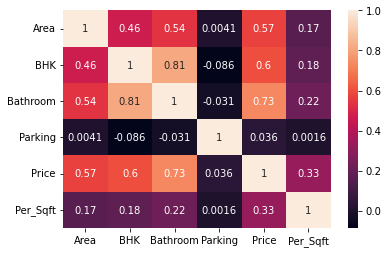

In [14]:
sns.heatmap(df.corr(), annot=True) 

* Area= Alan boyutu
* BHK=?
* Bathroom= Banyo Sayısı
* Furnishing= Döşeme
* Locality= Yerellik
* Parking=Otopark
* Price=Fiyat
* Status=Durumu
* Transaction=İşlem
* Type=Tip
* Per_Sqft=?

In [15]:
df["BHK"].unique()

array([2, 4, 3, 1, 6, 5, 7], dtype=int64)

In [16]:
df["Transaction"].unique()     #yeni mülk ya da yeniden satış

array(['New_Property', 'Resale'], dtype=object)

In [17]:
df["Per_Sqft"].unique()

array([  6667.,   6154.,   6364.,   8750.,   9722.,  14444.,  22000.,
         2235.,   3800.,   4247.,   3524.,  26666.,  15972., 183333.,
        20000.,  15556.,  16176.,   9259.,  18507.,   7000.,  72000.,
        43000.,   4444.,   3300.,  40000.,   5185.,   4000.,   3567.,
         1259.,   2500.,   5255.,   6528.,   6875.,   5714.,   7449.,
         8125.,   7931.,   5789.,   6471.,   8438.,   6508.,   8000.,
         6000.,   6250.,   6333.,   6714.,  28797.,  23840.,   4600.,
         4620.,   5000.,   6111.,  25512.,  22222.,  24718.,  30556.,
        18750., 120000.,  15459.,  23529.,  16667.,  11111.,  21409.,
        95000.,  15363.,  19259.,  20833.,  20930.,   6526.,   3901.,
         6347.,  41304.,   8701.,   5556.,  85715.,   6944.,   7222.,
        11220.,   5357.,   6706.,  10288.,  28283.,   8923.,   8222.,
        14550.,  30093.,  35714.,  22857.,  12500.,   4040.,   7778.,
        32000.,   5666.,  11667., 112179.,   6584.,   5794.,   7500.,
       160000.,  115

In [18]:
df["Price"].value_counts()

15000000    22
7000000     18
25000000    17
5500000     16
19000000    15
            ..
2670000      1
1950000      1
28900000     1
21900000     1
22200000     1
Name: Price, Length: 258, dtype: int64

In [19]:
df["Price"].value_counts().max()

22

In [20]:
df["Price"].unique()

array([  5000000,  15500000,   4200000,   6200000,  10000000,   4000000,
         6800000,  15000000,   7700000,   5500000,   3310000,   4700000,
         4500000,  17000000,  25000000,   6000000,  11000000,   5300000,
        10500000,  12000000,   7000000,   3400000,  21000000,  13000000,
        22000000,  15800000,  57500000,  30000000,  24000000,  31500000,
        14600000, 240000000,   8300000,  22500000,   1900000,   5130000,
         5890000,   3700000,  17400000,   2400000,  17200000,  14200000,
        13500000,  20500000,  16500000,  14900000,  19200000,  14500000,
        15600000,  11400000,  16000000,  14800000,   1850000,  40000000,
        46000000,  55000000,  24500000,  32500000,  20000000,  19000000,
        26000000,  27500000,  45000000,  28000000,  29500000,  12500000,
        11500000,  25500000,  31000000,  13400000,  35000000,   6300000,
        10300000,  28500000,   3600000,   4300000,   1650000,   2000000,
         3000000,   1400000,   2600000,   5100000, 

<AxesSubplot:xlabel='Price'>

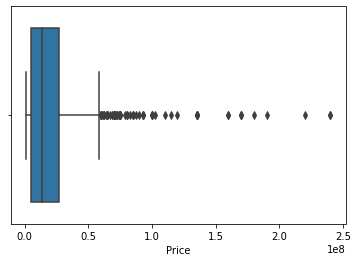

In [21]:
sns.boxplot(df.Price)

<AxesSubplot:xlabel='Price'>

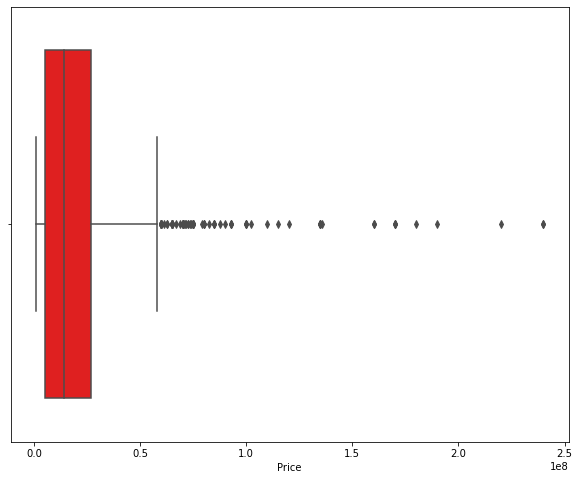

In [22]:
plt.figure(figsize=(10,8))
sns.boxplot(df.Price, color='red')

<AxesSubplot:xlabel='Price', ylabel='Density'>

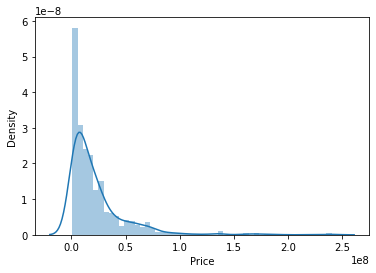

In [23]:
sns.distplot(df.Price)

In [24]:
df.isnull().sum()

Area           0
BHK            0
Bathroom       0
Furnishing     0
Locality       0
Parking        0
Price          0
Status         0
Transaction    0
Type           0
Per_Sqft       0
dtype: int64

In [25]:
df["Per_Sqft"]=df["Per_Sqft"].fillna("0")

In [26]:
df["Parking"].fillna(df["Parking"].mean(), inplace=True)

In [27]:
df

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0
5,1300.0,4,3.0,Semi-Furnished,Rohini Sector 24,1.0,15500000,Ready_to_move,New_Property,Builder_Floor,6667.0
...,...,...,...,...,...,...,...,...,...,...,...
1254,4118.0,4,5.0,Unfurnished,Chittaranjan Park,3.0,55000000,Ready_to_move,New_Property,Builder_Floor,12916.0
1255,1050.0,3,2.0,Semi-Furnished,Chittaranjan Park,3.0,12500000,Ready_to_move,Resale,Builder_Floor,12916.0
1256,875.0,3,3.0,Semi-Furnished,Chittaranjan Park,3.0,17500000,Ready_to_move,New_Property,Builder_Floor,12916.0
1257,990.0,2,2.0,Unfurnished,Chittaranjan Park Block A,1.0,11500000,Ready_to_move,Resale,Builder_Floor,12916.0


In [28]:
def regression_funct(x,y):
    
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

    L=LinearRegression()
    R=Ridge()
    Lass=Lasso()
    E=ElasticNet()
    ExTree=ExtraTreeRegressor()
    GBR=GradientBoostingRegressor()
    KN=KNeighborsRegressor()
    
    algos=[L,R,Lass,E,ExTree,GBR,KN]
    algo_names=['LinearRegression','Ridge','Lasso','ElasticNet','ExtraTreeRegressor','GradientBoostingRegressor','KNeighborsRegressor']
    r_squared=[]
    rmse=[]
    mae=[]
    
    result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)
    
    for item in algos:
        item.fit(x_train,y_train)
        item.predict(x_test)
        r_squared.append(r2_score(y_test,item.predict(x_test)))
        rmse.append((mean_squared_error(y_test,item.predict(x_test)))**.5)
        mae.append(mean_absolute_error(y_test,item.predict(x_test)))
        
    result.R_Squared=r_squared
    result.RMSE=rmse
    result.MAE=mae
        
    return result.sort_values('R_Squared',ascending=False)

In [29]:
x=df[["Bathroom", "Area", "BHK", "Per_Sqft", "Parking"]]

In [30]:
x

,Bathroom,Area,BHK,Per_Sqft,Parking
1,2.0,750.0,2,6667.0,1.0
2,2.0,950.0,2,6667.0,1.0
3,2.0,600.0,2,6667.0,1.0
4,2.0,650.0,2,6667.0,1.0
5,3.0,1300.0,4,6667.0,1.0
...,...,...,...,...,...
1254,5.0,4118.0,4,12916.0,3.0
1255,2.0,1050.0,3,12916.0,3.0
1256,3.0,875.0,3,12916.0,3.0
1257,2.0,990.0,2,12916.0,1.0


In [31]:
y=df["Price"]

In [32]:
regression_funct(x,y)

,R_Squared,RMSE,MAE
GradientBoostingRegressor,0.840893,1.176487e+07,6.090578e+06
ExtraTreeRegressor,0.728977,1.535486e+07,7.277206e+06
KNeighborsRegressor,0.718092,1.566017e+07,7.835393e+06
LinearRegression,0.568714,1.936981e+07,1.080940e+07
Lasso,0.568714,1.936981e+07,1.080940e+07
Ridge,0.568609,1.937216e+07,1.080507e+07
ElasticNet,0.527533,2.027348e+07,1.053968e+07
